![Cleaning data](Cleansing-Data.png)

## Six steps to clean data

Clean the **data structure**

1. **Scrape** the document (into a DataFrame)
2. Delete extra **rows**
3. Fix **column** structure

Clean the **data content**

4. Handle **missing** values
5. **Standardize** values
6. **Extract** unstructured data

1. Digitize the document. (format: PDF/Word/..., encoding: UTF-8/CP1252/...)
1. Delete extra rows (header, footer, total, subtotal, column number indicators, blank)
1. Fix column structure (missing headers, rename columns, mis-alignment)
1. Handle missing / duplicate values
  - De-duplicate rows (based on subset of data)
  - Identify (e.g. blank, NA, XX, 999, etc)
  - Ignore missing values
  - Remove rows with NA (subsetting) or columns with NA
  - Fill missing values:
    - Constant (e.g. zero, today, etc)
    - Column (e.g. created date  updated date)
    - Function (e.g. average of rows/columns)
    - External data
1. Standardize values
  - Convert text to numbers or dates
  - Remove extra characters (commas from numbers, prefixes, suffixes, spaces)
  - Correct mis-spellings
1. Extract unstructured data
  - Extract numbers with units (lbs & kgs, kph & mph)
  - Extract lists (e.g. multiple values in cells)
  - Extract dates (e.g. 25/10/16 or Oct 25, 2016)
  - Extract entities (e.g. names, places, phone numbers, PIN codes, things)
  - Extract name structure (e.g. title, first name, last name)

## Let's clean this analyst report

[Open file](Cleansing-Data-ABN-AMRO-report.pdf)

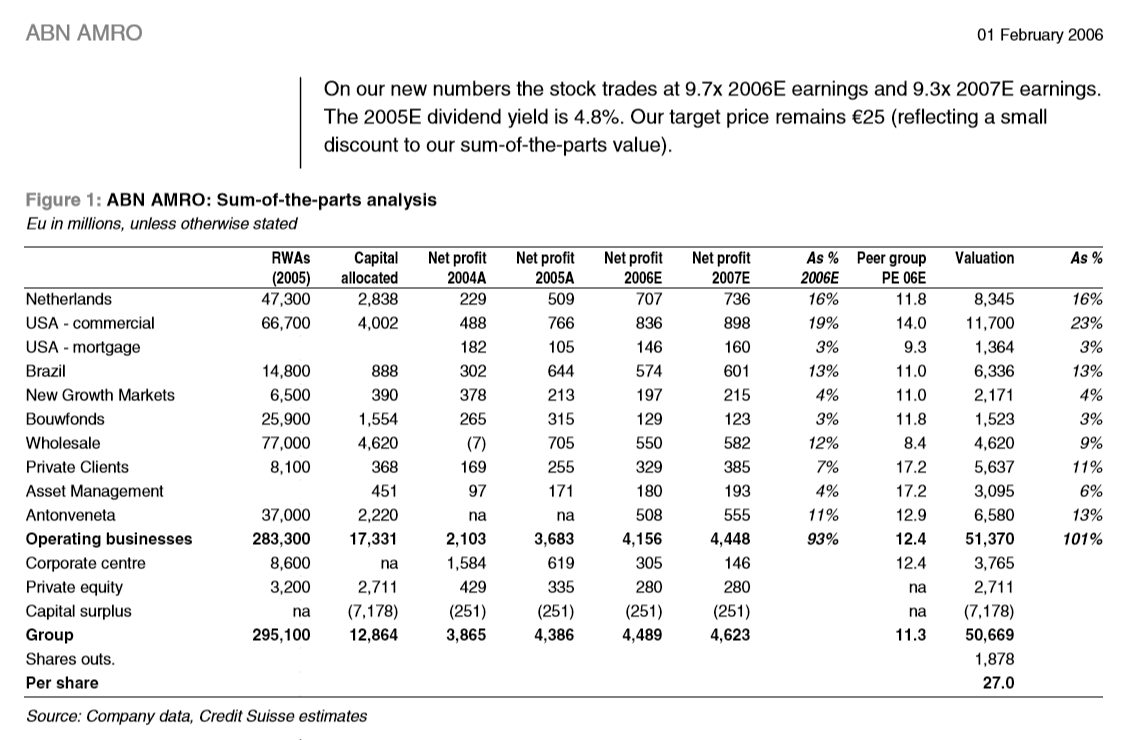

## 1. Scrape the document

Convert data in formats like PDF, HTML, Word, etc into a Python DataFrame

In [289]:
import tabula
data1 = tabula.read_pdf('Cleansing-Data-ABN-AMRO-report.pdf', pages=3)
data1

,Unnamed: 0,RWAs,Capital,Net profit,Net profit.1,Net profit.2,Net profit.3,As %,Peer group,Valuation,As %.1
0,NaN,(2005),allocated,2004A,2005A,2006E,2007E,2006E,PE 06E,NaN,NaN
1,Netherlands,"47,300","2,838",229,509,707,736,16%,11.8,"8,345",16%
2,USA - commercial,"66,700","4,002",488,766,836,898,19%,14.0,"11,700",23%
3,USA - mortgage,NaN,NaN,182,105,146,160,3%,9.3,"1,364",3%
4,Brazil,"14,800",888,302,644,574,601,13%,11.0,"6,336",13%
5,New Growth Markets,"6,500",390,378,213,197,215,4%,11.0,"2,171",4%
6,Bouwfonds,"25,900","1,554",265,315,129,123,3%,11.8,"1,523",3%
7,Wholesale,"77,000","4,620",(7),705,550,582,12%,8.4,"4,620",9%
8,Private Clients,"8,100",368,169,255,329,385,7%,17.2,"5,637",11%
9,Asset Management,NaN,451,97,171,180,193,4%,17.2,"3,095",6%


## 2. Delete extra rows

Header, footer, total, subtotal, column number indicators, blank rows, etc.

In [209]:
data2 = (data1
         .set_index('Unnamed: 0')
         .drop([pd.np.nan, 'Operating businesses', 'Group', 'Shares outs.', 'Per share'])
        )
data2

,RWAs,Capital,Net profit,Net profit.1,Net profit.2,Net profit.3,As %,Peer group,Valuation,As %.1
Unnamed: 0,,,,,,,,,,
Netherlands,"47,300","2,838",229,509,707,736,16%,11.8,"8,345",16%
USA - commercial,"66,700","4,002",488,766,836,898,19%,14.0,"11,700",23%
USA - mortgage,NaN,NaN,182,105,146,160,3%,9.3,"1,364",3%
Brazil,"14,800",888,302,644,574,601,13%,11.0,"6,336",13%
New Growth Markets,"6,500",390,378,213,197,215,4%,11.0,"2,171",4%
Bouwfonds,"25,900","1,554",265,315,129,123,3%,11.8,"1,523",3%
Wholesale,"77,000","4,620",(7),705,550,582,12%,8.4,"4,620",9%
Private Clients,"8,100",368,169,255,329,385,7%,17.2,"5,637",11%
Asset Management,NaN,451,97,171,180,193,4%,17.2,"3,095",6%


# 3. Fix column structure

Missing header row, column names split across rows / columns, mis-aligned columns, etc

In [210]:
data3 = data2.copy()
data3.columns = ['RWAs', 'Capital allocated', 'Net profit 2004A', 'Net profit 2005A', 'Net profit 2006E', 'Net profit 2007E', 'As % 2006E', 'Peer group PE06E', 'Valuation', 'As %']
data3.index.name = 'Business'
data3

,RWAs,Capital allocated,Net profit 2004A,Net profit 2005A,Net profit 2006E,Net profit 2007E,As % 2006E,Peer group PE06E,Valuation,As %
Business,,,,,,,,,,
Netherlands,"47,300","2,838",229,509,707,736,16%,11.8,"8,345",16%
USA - commercial,"66,700","4,002",488,766,836,898,19%,14.0,"11,700",23%
USA - mortgage,NaN,NaN,182,105,146,160,3%,9.3,"1,364",3%
Brazil,"14,800",888,302,644,574,601,13%,11.0,"6,336",13%
New Growth Markets,"6,500",390,378,213,197,215,4%,11.0,"2,171",4%
Bouwfonds,"25,900","1,554",265,315,129,123,3%,11.8,"1,523",3%
Wholesale,"77,000","4,620",(7),705,550,582,12%,8.4,"4,620",9%
Private Clients,"8,100",368,169,255,329,385,7%,17.2,"5,637",11%
Asset Management,NaN,451,97,171,180,193,4%,17.2,"3,095",6%


In [329]:
data3['RWAs']

Business
Netherlands           47,300
USA - commercial      66,700
USA - mortgage           NaN
Brazil                14,800
New Growth Markets     6,500
Bouwfonds             25,900
Wholesale             77,000
Private Clients        8,100
Asset Management         NaN
Antonveneta           37,000
Corporate centre       8,600
Private equity         3,200
Capital surplus           na
Name: RWAs, dtype: object

# 4. Handle missing values

- Identify missing values (blank, NA, XX, 999, ...)
- Plan a strategy to handle them
  - Do nothing
  - Remove rows / columns with missing values
  - Fill with a constant (e.g. zero, today, etc)
  - Fill from another column (e.g. defaults)
  - Fill using a function (e.g. average)
  - Fill with external data

In [211]:
data4 = data3.replace('na', pd.np.nan)
data4

,RWAs,Capital allocated,Net profit 2004A,Net profit 2005A,Net profit 2006E,Net profit 2007E,As % 2006E,Peer group PE06E,Valuation,As %
Business,,,,,,,,,,
Netherlands,"47,300","2,838",229,509,707,736,16%,11.8,"8,345",16%
USA - commercial,"66,700","4,002",488,766,836,898,19%,14.0,"11,700",23%
USA - mortgage,NaN,NaN,182,105,146,160,3%,9.3,"1,364",3%
Brazil,"14,800",888,302,644,574,601,13%,11.0,"6,336",13%
New Growth Markets,"6,500",390,378,213,197,215,4%,11.0,"2,171",4%
Bouwfonds,"25,900","1,554",265,315,129,123,3%,11.8,"1,523",3%
Wholesale,"77,000","4,620",(7),705,550,582,12%,8.4,"4,620",9%
Private Clients,"8,100",368,169,255,329,385,7%,17.2,"5,637",11%
Asset Management,NaN,451,97,171,180,193,4%,17.2,"3,095",6%


# 5. Standardize values

- Convert text to numbers or dates
- Remove extra characters (prefixes, suffixes, spaces)
- Correct mis-spellings

In [334]:
data5 = (data4
        .replace(',', '', regex=True)                # Remove commas
        .replace('\((\d+)\)', r'-\1', regex=True)    # Convert (10) to -10
        .replace('%$', '', regex=True)               # Convert % to numbers
        .astype(float)                               # Convert to numbers
        )
data5.sum()

RWAs                 295100.0
Capital allocated     12864.0
Net profit 2004A       3865.0
Net profit 2005A       4386.0
Net profit 2006E       4490.0
Net profit 2007E       4623.0
As % 2006E               92.0
Peer group PE06E        137.0
Valuation             50669.0
As %                    101.0
dtype: float64

## 6. Extract unstructured data

- Extract numbers with units (lbs & kgs, kph & mph)
- Extract lists (e.g. multiple values in cells)
- Extract dates (e.g. 25/10/16 or Oct 25, 2016)
- Extract entities (e.g. names, places, phone numbers, PIN codes, things)
- Extract name structure (e.g. title, first name, last name)

This dataset has none of those. Let's pick another dataset.

# Product dosage composition

This is a [random dataset](http://ravenbhelpharma.com/composition.xlsx) I found yesterday.

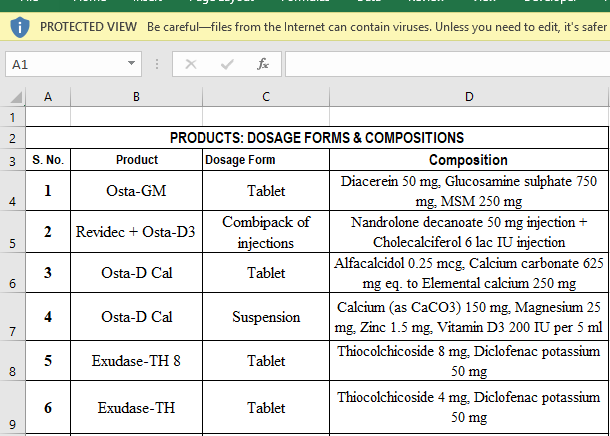

## Let's clean the data

In [259]:
import pandas as pd
pharma = pd.read_excel('Cleansing-Data-composition.xlsx', skiprows=[0, 1]).set_index('S. No.')
pharma.head()

,Product,Dosage Form,Composition
S. No.,,,
1,Osta-GM,Tablet,"Diacerein 50 mg, Glucosamine sulphate 750 mg, ..."
2,Revidec + Osta-D3,Combipack of injections,Nandrolone decanoate 50 mg injection + Choleca...
3,Osta-D Cal,Tablet,"Alfacalcidol 0.25 mcg, Calcium carbonate 625 m..."
4,Osta-D Cal,Suspension,"Calcium (as CaCO3) 150 mg, Magnesium 25 mg, Zi..."
5,Exudase-TH 8,Tablet,"Thiocolchicoside 8 mg, Diclofenac potassium 50 mg"


1. **Scrape** the document: **Done**. `pd.read_excel`.
2. Delete extra **rows**: **Done**. `skiprows=[0, 1]`
3. Fix **column** structure: **None**. It's OK

as well as in data **content**

4. Handle **missing** values: **None**.
5. **Standardize** values: TODO
6. **Extract** unstructured data: TODO

## 5. Standardize values

The "Dosage Form" column is not standardized.

In [260]:
pharma.sort_values('Dosage Form', ascending=True)

,Product,Dosage Form,Composition
S. No.,,,
37,Zopra-DSR,Capsule,Rabeprazole sodium 20 mg (enteric coated pelle...
23,Odpant-DSR,Capsule,"Pantoprazole 40 mg, Domperidone 30 mg (sustain..."
13,Zintra-G,Capsule,"Asian Ginseng extract powder, Vitamins, Minerals"
33,Indopra,Capsule,"Indomethacin 75 mg, Omeprazole 20 mg"
47,Ezycart,Capsule,"Rose hip powder 700 mg, Cucumin 80 mg, Wheat g..."
24,SFe,Chewable tablet,"Sodium feredetate 231 mg, Folic acid 1.5 mg, V..."
2,Revidec + Osta-D3,Combipack of injections,Nandrolone decanoate 50 mg injection + Choleca...
39,Revicof,Cough Syrup,"Dextromethorphan 10 mg, Chlorpheniramine malea..."
19,Revibrox Plus,Cough Syrup,"Bromhexine 4 mg, Terbutaline 1.25 mg, Guaiphen..."


## 5. Standardize values with fingerprints

In [338]:
from jellyfish import metaphone, soundex, nysiis, match_rating_codex
metaphone('tablot')

'TBLT'

In [339]:
pharma['Dosage Form'].apply(metaphone)

S. No.
1                          TBLT
2              KMBPK OF INJKXNS
3                          TBLT
4                        SSPNXN
5                          TBLT
6                          TBLT
7                          TBLT
8                          TBLT
9                          TBLT
10                         TBLT
11                         TBLT
12                          SRP
13                         KPSL
14                          PTR
15                 SFTJLTN KPSL
16                       SSPNXN
17                       MSJ OL
18                         TRPS
19                        K SRP
20                         TBLT
21                       INJKXN
22                         TBLT
23                         KPSL
24                    XWBL TBLT
25                   FJNL SPSTR
26                      PRNL WX
27                       INJKXN
28                         TBLT
29                       SSPNXN
30                          JL 
31                           OL
3

In [341]:
pharma.groupby(pharma['Dosage Form'].apply(soundex))['Dosage Form'].unique().tolist()

[array(['Capsule', 'Capsule ', 'capsule'], dtype=object),
 array(['Chewable tablet'], dtype=object),
 array(['Cough Syrup'], dtype=object),
 array(['Combipack of injections'], dtype=object),
 array(['Drops'], dtype=object),
 array(['Dry syrup'], dtype=object),
 array(['Each film coated Tablets contains:'], dtype=object),
 array(['Each eneteric coated tablet contains:'], dtype=object),
 array(['Each ml contains:', 'Each 1 ml injection contains:',
        'Each 5 ml contains:', 'Each ml contain:'], dtype=object),
 array(['Each hard gelatin capsule contains:'], dtype=object),
 array(['Gel  '], dtype=object),
 array(['Injection', 'injection'], dtype=object),
 array(['Massage Oil'], dtype=object),
 array(['Oil'], dtype=object),
 array(['Oral solution'], dtype=object),
 array(['Powder'], dtype=object),
 array(['Perineal Wash'], dtype=object),
 array(['Roll on for use in nasal congestion'], dtype=object),
 array(['Softgelatin Capsule'], dtype=object),
 array(['Suspension', 'suspension'], dtyp

## 5. Standardize values: custom fingerprints

You can create your own fuzzy matching algorithms too.

For example, let's listen to a few [Hindi songs from AR Rahman](http://www.s-anand.net/blog/a-r-rahman-hindi-songs/)

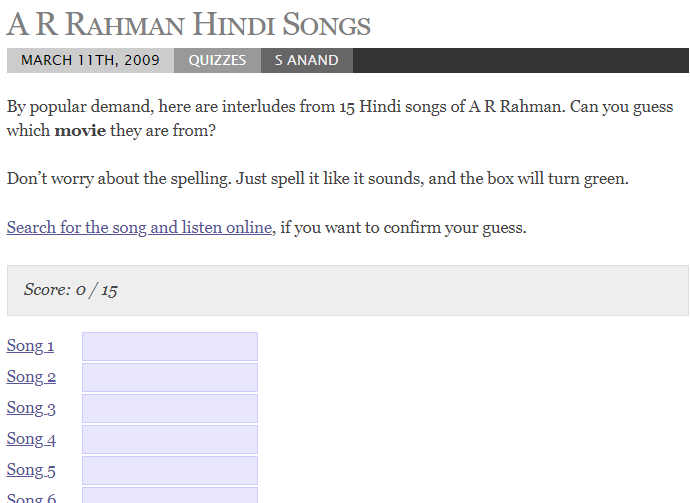

## 5. Standardize values: custom fingerprints

In [265]:
def fingerprint_hindi(s):    
        s = s + ' '
        s = s.upper()                               # Upper case
        s = re.sub(r'\s+', ' ', s)                  # Single space
        s = re.sub(r'W', 'V', s)                    # Vivaah or Wivaah?
        s = re.sub(r'KSH', 'X', s)                  # Dixit or Deekshit?
        s = re.sub(r'Z', 'J', s)                    # Jabardast or Zabardast?
        s = re.sub(r'PH', 'F', s)                   # Phirangi or Firangi?
        s = re.sub(r'([KGCJTDPBS])H', r'\1', s)     # Dheeraj or Diraj?
        s = re.sub(r'(.)\1', r'\1', s)              # Kaala or Kala?
        s = re.sub(r'Y', '', s)                     # Koyi or Koi?
        s = re.sub(r'([AEIOU])N ', r'\1', s)        # Hein or Hai?
        s = re.sub(r'[AEIOU]', '', s)               # Rehman or Rahman?
        s = re.sub(r' ', '', s)                     # Remove spaces
        return s

In [304]:
assert fingerprint_hindi('Meenakshi Dixit') == fingerprint_hindi('minaxi  deekshith') == 'MNXDXT'
assert fingerprint_hindi('Ye Dil Hai Mushkil') == fingerprint_hindi('e dil hein muskil') == 'DLHMSKL'

In [76]:
# Here's an example of the fingerprint algorithm 
# Source: https://gist.github.com/cjdd3b/0386f139bb953f046c6e
import re
import string
from unidecode import unidecode    # install this

PUNCTUATION = re.compile('[%s]' % re.escape(string.punctuation))

def preprocess(string):
    return PUNCTUATION.sub('', string.strip().lower())

def unique_preserving_order(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
        
def fingerprint(s):
    s = preprocess(s)
    return unidecode(' '.join(unique_preserving_order(sorted(s.split()))))

def ngram_fingerprint(s, n=1):
    s = preprocess(s)
    return unidecode(''.join(unique_preserving_order(sorted([s[i:i + n] for i in range(len(s) - n + 1)]))))

## 5. Standardize values: constituencies

Let's apply fingerprinting to the list of assembly constituency names across years.

In [285]:
assembly = pd.read_csv('D:/site/gramener.com/viz/india-election-data/assembly-elections/assembly.csv')
assembly

C:\anaconda\3.6\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ST_NAME,YEAR,AC_NO,AC_NAME,AC_TYPE,#,NAME,SEX,AGE,CATEGORY,PARTY,VOTES
0,Andhra Pradesh,1955,1,ICHAPURAM,GEN,1,UPPADA RANGABABU,M,NaN,NaN,KLP,14565
1,Andhra Pradesh,1955,1,ICHAPURAM,GEN,2,HARIHARA PATNAIK,M,NaN,NaN,IND,7408
2,Andhra Pradesh,1955,1,ICHAPURAM,GEN,3,PUDI LOKANADHAM,M,NaN,NaN,IND,6508
3,Andhra Pradesh,1955,1,ICHAPURAM,GEN,4,KALLA BALARAMA SWAMY,M,NaN,NaN,IND,3002
4,Andhra Pradesh,1955,1,ICHAPURAM,GEN,5,BANIKINKARA SHARMA,M,NaN,NaN,IND,682
5,Andhra Pradesh,1955,2,SOMPETA,GEN,1,GOUTU LATCHANNA,M,NaN,NaN,KLP,21436
6,Andhra Pradesh,1955,2,SOMPETA,GEN,2,MARUPPU PAMANABHAM,M,NaN,NaN,CPI,9261
7,Andhra Pradesh,1955,2,SOMPETA,GEN,3,PUDI LOKANADHAM,M,NaN,NaN,IND,934
8,Andhra Pradesh,1955,3,BRAHMANATARALA,GEN,1,NICHARIA RAMULU,M,NaN,NaN,KLP,11243
9,Andhra Pradesh,1955,3,BRAHMANATARALA,GEN,2,UPPADA RAMARAO,M,NaN,NaN,CPI,6034


## 5. Standardize values: constituencies

This corrects phonetic spellings mistakes like:

- BHADRACHALAM, BHADRACHELAM, BHADRAHCALAM
- TUGHLAKABAD, TUGHLAQABAD, TUGHLAQUABAD, TUGLAKABAD
- RISHIVANDIYAM, RISHIVADIYAM, RISHIVANDIAM, RISHIVANDIAM, RISHIVANDIYAM

... and non-phonetic ones like:

- OOTACAMUND, UDHAGAMANDALAM
- POTTAPIDARAM, OTTAPIDARAM
- HARASAPUR, NARSAPUR

... but we were still left with a huge gap.

## A brief detour: Delimitation

Constituencies are defined in rough proportion to population.

- 1952: Constituencies defined using 1951 census
- 1962: Constituencies defined using 1961 census
- 1972: Constituencies defined using 1971 census
- 1976: Stop delimitation until 2000. States promoting family planning don't lose
- 2002: Extend till 2026. But apply intra-state delimitation. Preserve # seats per state
- 2008: Intra-state delimination was actually implemented

For each of these years, we have potential re-definition of constituencies.

The biggest nightmare this caused me was **Machilipatnam**.

## A brief detour: Machilipatnam

![Machilipatnam market](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Machilipatnam_koneru_center_3.JPG/250px-Machilipatnam_koneru_center_3.JPG)

Has 2 different names:

- Masulipatnam (or Machilipatnam): derived from the Greek trade of "muslin" (plain woven) cloth
- Bandar: derived from the Turkish word for "port"

In 2008, the Bandar constituency was *renamed* to Machilipatnam.

- Machilipatnam was NOT a new constituency
- Bandar was not removed from the list
- So history needs to be preserved

## 5. Standardize values: analysis

This is where the data itself came in handy.

![Assembly elections constituencies](Cleansing-Data-assembly-elections.png)

## 6. Extract values

- Extract numbers with units (lbs & kgs, kph & mph)
- Extract lists (e.g. multiple values in cells)
- Extract dates (e.g. 25/10/16 or Oct 25, 2016)
- Extract entities (e.g. names, places, phone numbers, PIN codes, things)
- Extract name structure (e.g. title, first name, last name)

## 6. Extract values: composition list

In [305]:
pharma['Composition'].head()

S. No.
1    Diacerein 50 mg, Glucosamine sulphate 750 mg, ...
2    Nandrolone decanoate 50 mg injection + Choleca...
3    Alfacalcidol 0.25 mcg, Calcium carbonate 625 m...
4    Calcium (as CaCO3) 150 mg, Magnesium 25 mg, Zi...
5    Thiocolchicoside 8 mg, Diclofenac potassium 50 mg
Name: Composition, dtype: object

In [311]:
components = pharma['Composition'].str.split(r'\s*[,\+]\s*').apply(pd.Series).stack()
components.head(10)

S. No.   
1       0                                      Diacerein 50 mg
        1                          Glucosamine sulphate 750 mg
        2                                           MSM 250 mg
2       0                 Nandrolone decanoate 50 mg injection
        1                   Cholecalciferol 6 lac IU injection
3       0                                Alfacalcidol 0.25 mcg
        1    Calcium carbonate 625 mg eq. to Elemental calc...
4       0                            Calcium (as CaCO3) 150 mg
        1                                      Magnesium 25 mg
        2                                          Zinc 1.5 mg
dtype: object

## 6. Extract values: lists

In [327]:
extracts = components.str.extract('(.*?)\s*(\d+)\s*(ml|mg|mcg|g|gm).*')
extracts['text'] = components
extracts.head()

0    1    2                                  text
S. No.                                                                        
1      0             Diacerein   50   mg                       Diacerein 50 mg
       1  Glucosamine sulphate  750   mg           Glucosamine sulphate 750 mg
       2                   MSM  250   mg                            MSM 250 mg
2      0  Nandrolone decanoate   50   mg  Nandrolone decanoate 50 mg injection
       1                   NaN  NaN  NaN    Cholecalciferol 6 lac IU injection

## Don't overdo it

![Mess](https://imgs.xkcd.com/comics/mess.png)

# Let's automate as open source

We're creating an open source tool on **[Github: gramener/dataaudit](https://github.com/gramener/dataaudit)**.

(See the **dev** branch for now.)

We'll start with cleaning public health data at UP & Bihar.

Join in!